# Problem Statement


As an e-commerce platform, it is very important to profile your customers, dividing your clientele base into groups based on their needs and expectations. Grouping will help us come up with dedicated marketing strategies and will aid us in recommending products to different user bases. In this project, we are interested in analyzing the content of an E-commerce database that lists purchases made by ∼4000 customers over a period of one year (1/12/2010 to 9/12/2011). Based on this analysis, we would like to develop models to group the 4000 customers into different buckets. Such a model must take into account the similarity between the products purchased between the users (i.e. a user might purchase 2 different products which are very similar to each other), the spending patterns of a user, their meta information, etc.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/data.csv",encoding="unicode_escape")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
175440,551958,22679,FRENCH BLUE METAL DOOR SIGN 4,10,5/5/2011 12:37,1.25,13883.0,United Kingdom
175441,551958,22678,FRENCH BLUE METAL DOOR SIGN 3,10,5/5/2011 12:37,1.25,13883.0,United Kingdom
175442,551958,22677,FRENCH BLUE METAL DOOR SIGN 2,10,5/5/2011 12:37,1.25,13883.0,United Kingdom
175443,551958,22676,FRENCH BLUE METAL DOOR SIGN 1,10,5/5/2011 12:37,1.25,13883.0,United Kingdom


In [4]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

boxplot for all numerical variables

Text(0.5, 1.0, 'Unitprice and Quantity distribution')

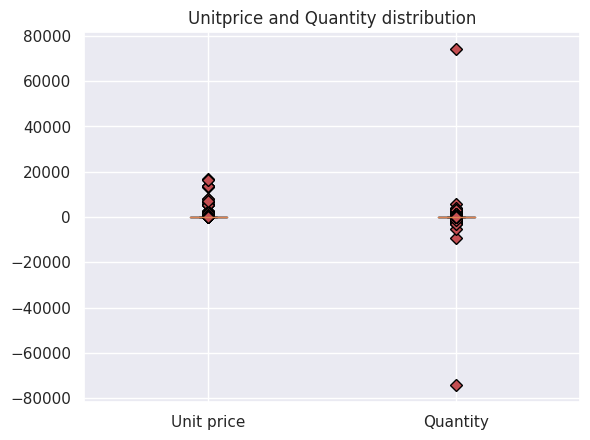

In [11]:
sns.set(style="darkgrid")
data = df[['UnitPrice','Quantity']]
red_diamond = dict(markerfacecolor='r', marker='D')
plt.boxplot(data.values, labels=["Unit price","Quantity"],flierprops = red_diamond)
plt.title("Unitprice and Quantity distribution")


Histogram for numerical variables

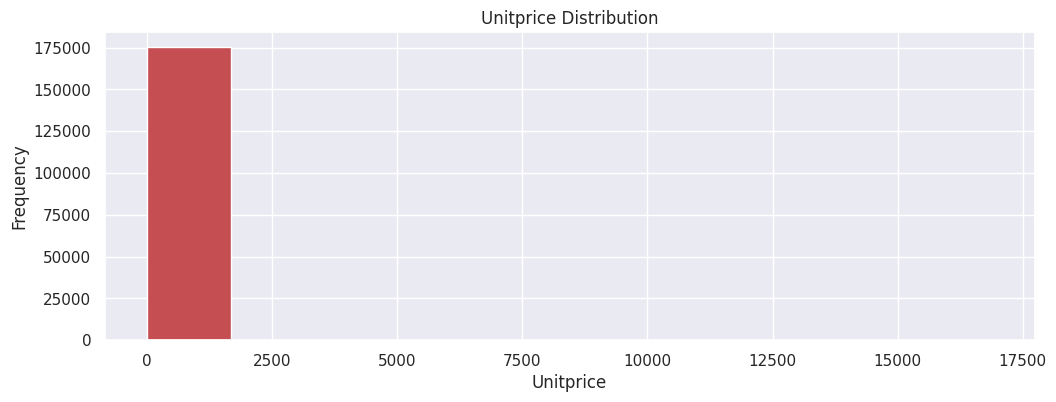

In [12]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,4))
plt.hist(df['UnitPrice'],color='r')
plt.title("Unitprice Distribution")
plt.xlabel("Unitprice")
plt.ylabel("Frequency")
plt.show()


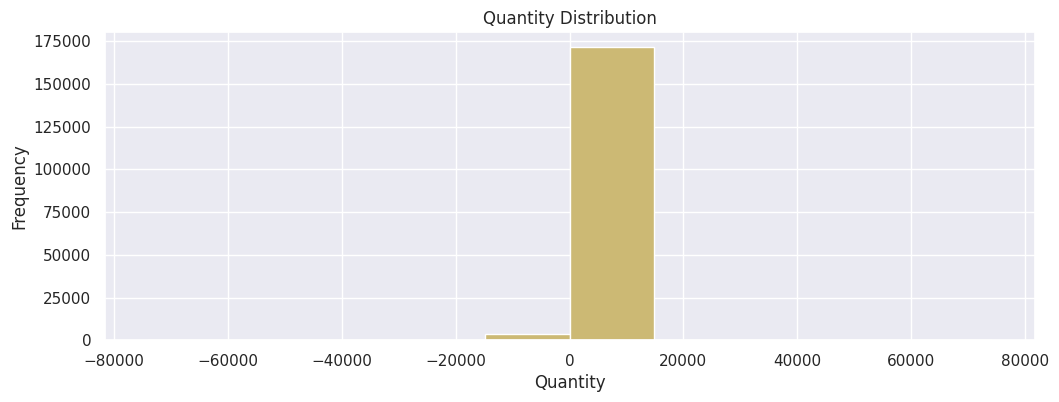

In [13]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,4))
plt.hist(df['Quantity'],color='y')
plt.title("Quantity Distribution")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()


distribution plot for numerical variables

<ipython-input-15-e7b4ce81b70d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((df.head()['UnitPrice']))


<Axes: xlabel='UnitPrice', ylabel='Density'>

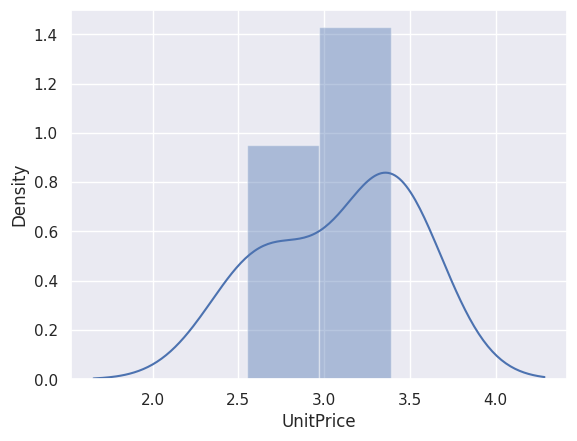

In [15]:
sns.distplot((df.head()['UnitPrice']))

<ipython-input-16-90e20bb97ca7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((df.head()['Quantity']))


<Axes: xlabel='Quantity', ylabel='Density'>

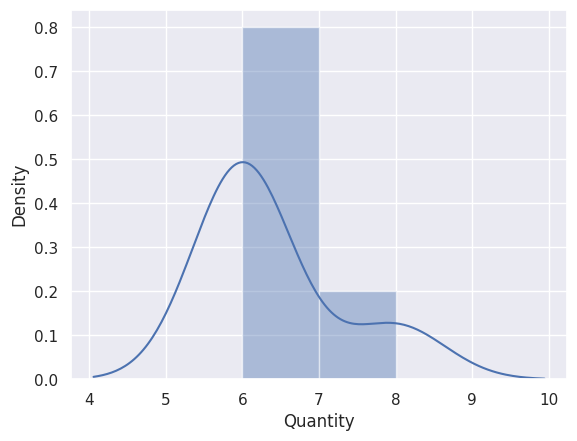

In [16]:
sns.distplot((df.head()['Quantity']))

Aggregation for all numeric column

In [17]:
df.aggregate({"Quantity" : ['mean','std','median','count','sum','max','min'],
                   "UnitPrice" : ['mean','std','median','count','sum','max','min'],
                  "CustomerID" : ['mean','std','median','count','sum','max','min']}).round(2)

,Quantity,UnitPrice,CustomerID
mean,9.17,5.11,1.528633e+04
std,256.39,100.47,1.728640e+03
median,3.00,2.25,1.517900e+04
count,175445.00,175445.00,1.231560e+05
sum,1608728.00,896137.94,1.882604e+09
max,74215.00,16888.02,1.828300e+04
min,-74215.00,0.00,1.234600e+04


Unique value across all columns

In [19]:
df.nunique()

InvoiceNo      8887
StockCode      3424
Description    3336
Quantity        409
InvoiceDate    8007
UnitPrice       812
CustomerID     2519
Country          36
dtype: int64

duplicate values across all columns

In [20]:
duplicate= df[df.duplicated()]
duplicate

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
174236,551776,22924,FRIDGE MAGNETS LA VIE EN ROSE,6,5/4/2011 11:23,0.85,13268.0,United Kingdom
174478,551817,47566,PARTY BUNTING,1,5/4/2011 11:50,4.95,17974.0,United Kingdom
174480,551817,84279B,CHERRY BLOSSOM DECORATIVE FLASK,1,5/4/2011 11:50,3.75,17974.0,United Kingdom
175021,551869,22984,CARD GINGHAM ROSE,12,5/4/2011 16:36,0.42,16767.0,United Kingdom


correlation and heatmap for all numerical variables

In [21]:
df.corr()

<ipython-input-21-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Quantity,UnitPrice,CustomerID
Quantity,1.000000,-0.001144,-0.003741
UnitPrice,-0.001144,1.000000,-0.004907
CustomerID,-0.003741,-0.004907,1.000000


<ipython-input-22-0a3d1a90f0c6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True,linewidths=2,cmap='winter')


<Axes: >

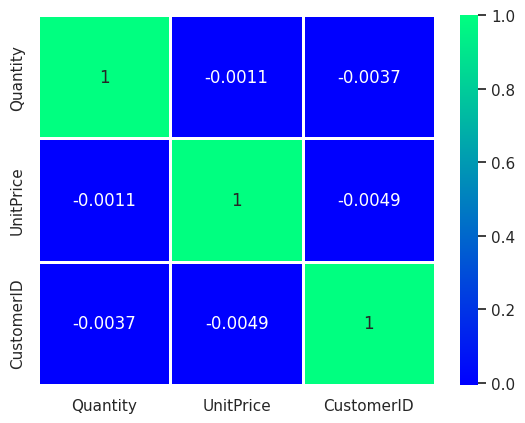

In [22]:
sns.heatmap(df.corr(), annot = True,linewidths=2,cmap='winter')

Regression plot all numerical variables

Text(0.5, 1.0, 'UnitPrice vs Quantity')

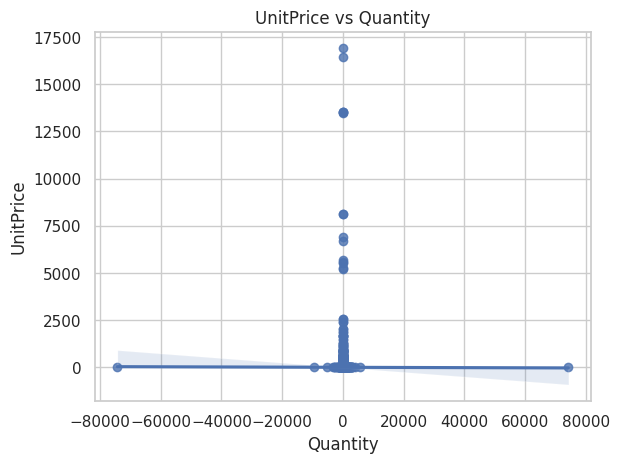

In [23]:
sns.set_style('whitegrid')
sns.regplot(data=df, x='Quantity',y='UnitPrice')
plt.title('UnitPrice vs Quantity')

Bar plot for every categorical variables vs numerical variables

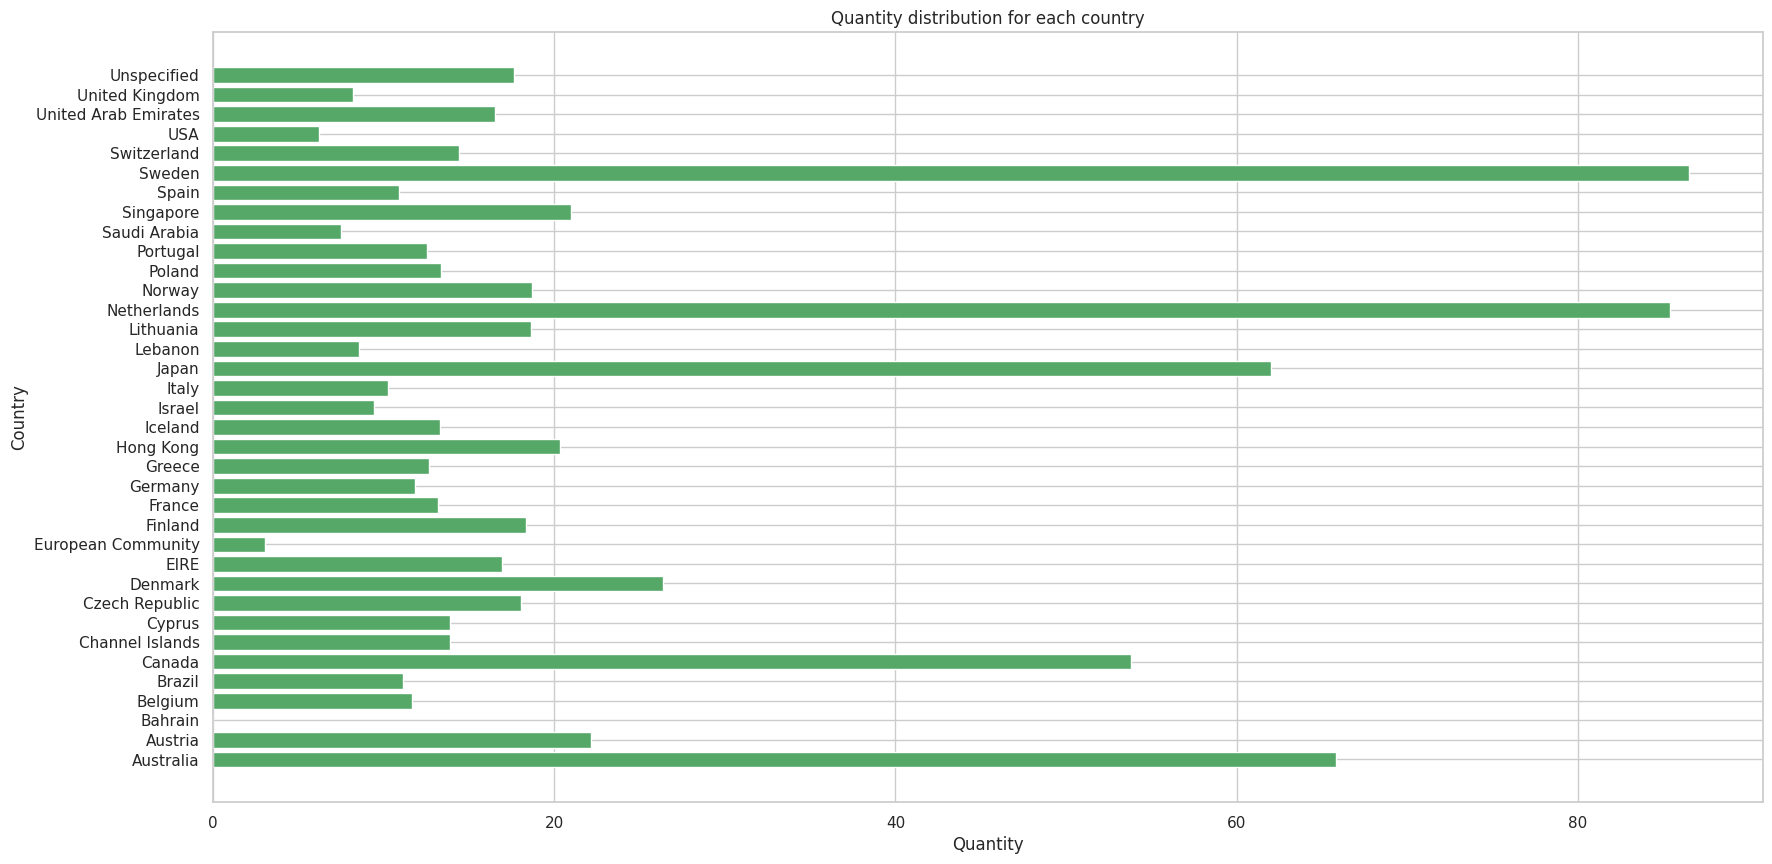

In [24]:
df.groupby('Country')['Quantity'].mean()
data_country_quantity = df.groupby('Country')['Quantity'].mean()

x = data_country_quantity.values.tolist()
y = data_country_quantity.index.tolist()

plt.figure(figsize=(20,10))
plt.barh(y,x,color=['g'])
plt.xlabel("Quantity")
plt.ylabel("Country")
plt.title("Quantity distribution for each country")
plt.show()

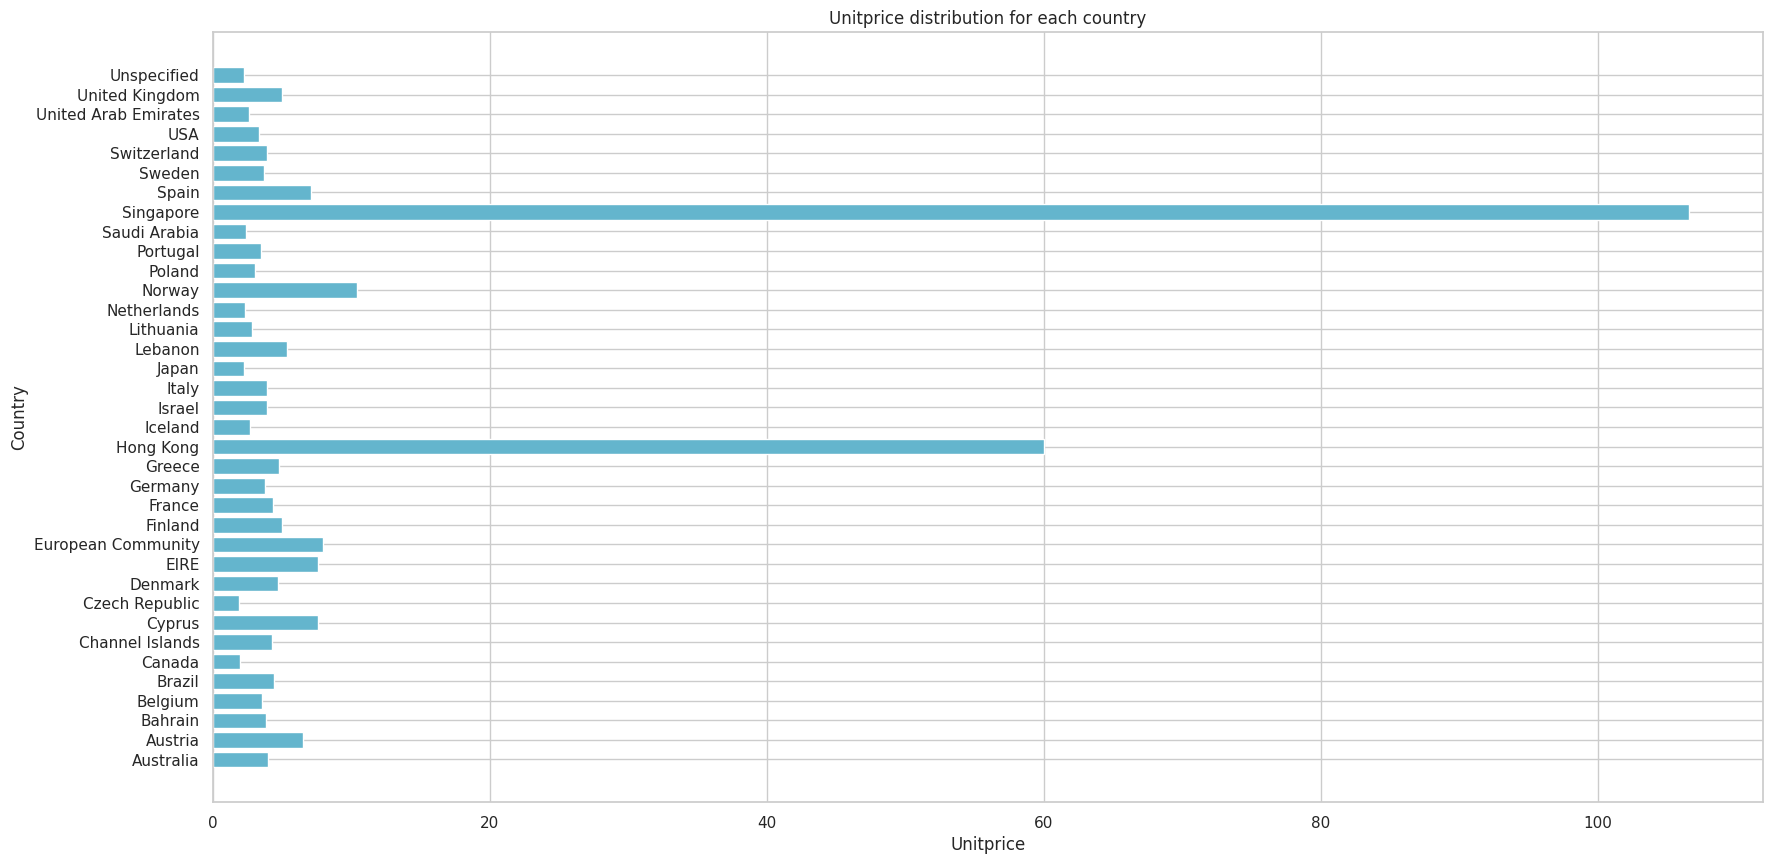

In [25]:
df.groupby('Country')['UnitPrice'].mean()
data_country_unitprice = df.groupby('Country')['UnitPrice'].mean()

x = data_country_unitprice.values.tolist()
y = data_country_unitprice.index.tolist()

plt.figure(figsize=(20,10))
plt.barh(y,x,color=['c'])
plt.xlabel("Unitprice")
plt.ylabel("Country")
plt.title("Unitprice distribution for each country")
plt.show()

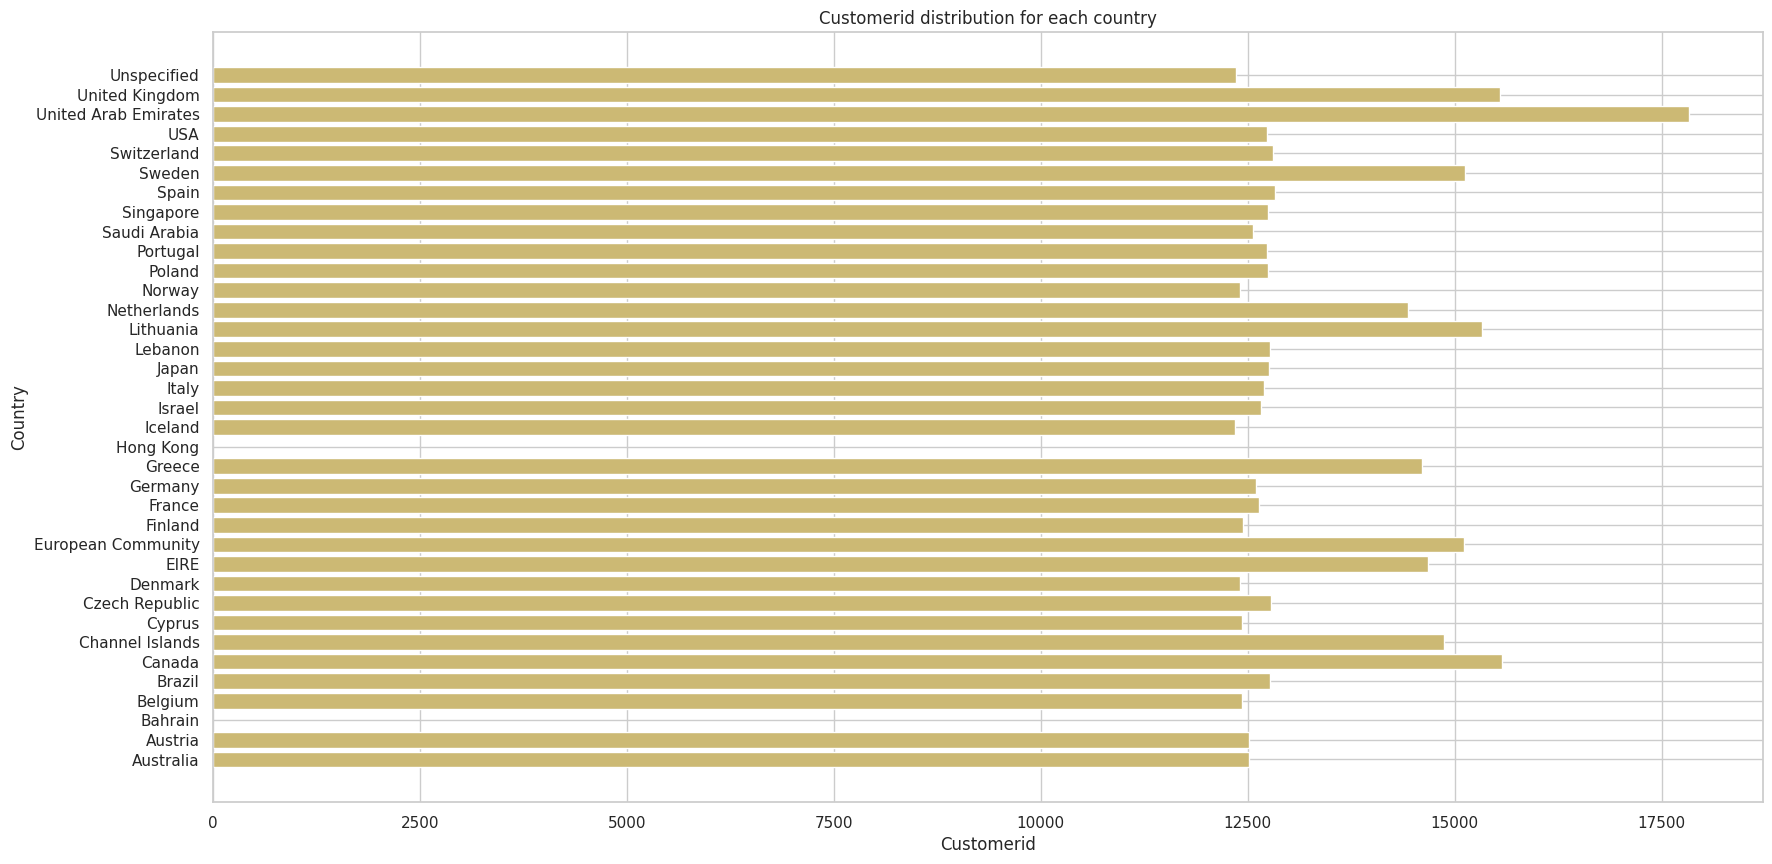

In [26]:
df.groupby('Country')['CustomerID'].mean()
data_country_unitprice = df.groupby('Country')['CustomerID'].mean()

x = data_country_unitprice.values.tolist()
y = data_country_unitprice.index.tolist()

plt.figure(figsize=(20,10))
plt.barh(y,x,color=['y'])
plt.xlabel("Customerid")
plt.ylabel("Country")
plt.title("Customerid distribution for each country")
plt.show()

Line chart to show the trend of data - All Numerical Variables

<Axes: xlabel='Quantity', ylabel='UnitPrice'>

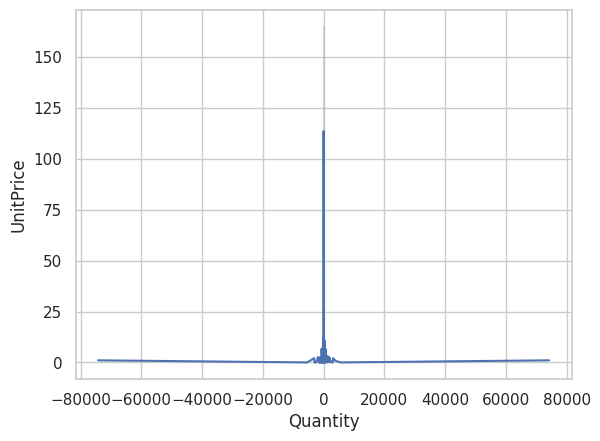

In [27]:
sns.lineplot(data=df, x="Quantity",y="UnitPrice")

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, 'United Kingdom'),
  Text(1, 0, 'France'),
  Text(2, 0, 'Australia'),
  Text(3, 0, 'Netherlands'),
  Text(4, 0, 'Germany'),
  Text(5, 0, 'Norway'),
  Text(6, 0, 'EIRE'),
  Text(7, 0, 'Switzerland'),
  Text(8, 0, 'Spain'),
  Text(9, 0, 'Poland'),
  Text(10, 0, 'Portugal'),
  Text(11, 0, 'Italy'),
  Text(12, 0, 'Belgium'),
  Text(13, 0, 'Lithuania'),
  Text(14, 0, 'Japan'),
  Text(15, 0, 'Iceland'),
  Text(16, 0, 'Channel Islands'),
  Text(17, 0, 'Denmark'),
  Text(18, 0, 'Cyprus'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Austria'),
  Text(21, 0, 'Israel'),
  Text(22, 0, 'Finland'),
  Text(23, 0, 'Bahrain'),
  Text(24, 0, 'Greece'),
  Text(25, 0, 'Hong Kong'),
  Text(26, 0, 'Singapore'),
  Text(27, 0, 'Lebanon'),
  Text(28, 0, 'United Arab Emirates'),
  Text(29, 0, 'Saudi

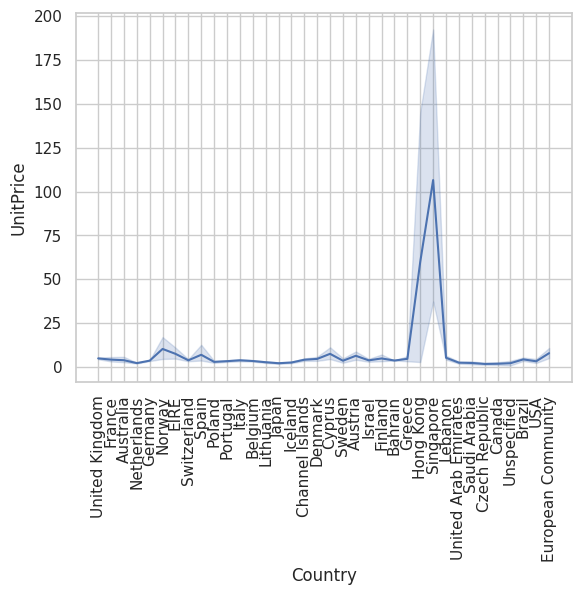

In [30]:
sns.lineplot(data=df, x="Country", y="UnitPrice")
plt.xticks(rotation=90)

<Axes: xlabel='CustomerID', ylabel='UnitPrice'>

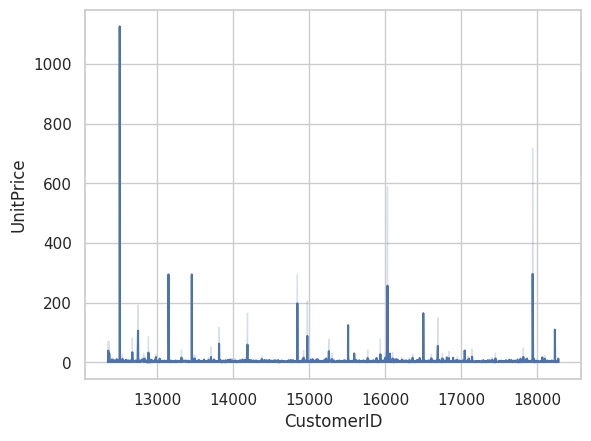

In [29]:
sns.lineplot(data=df, x="CustomerID", y="UnitPrice")

Plot the skewness - All Numeric Variables

In [31]:
df['Skewed Data'] = pd.DataFrame(df.skew(axis=1,skipna=True))

<ipython-input-31-0aff981e4f40>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['Skewed Data'] = pd.DataFrame(df.skew(axis=1,skipna=True))


<Axes: xlabel='Skewed Data', ylabel='Count'>

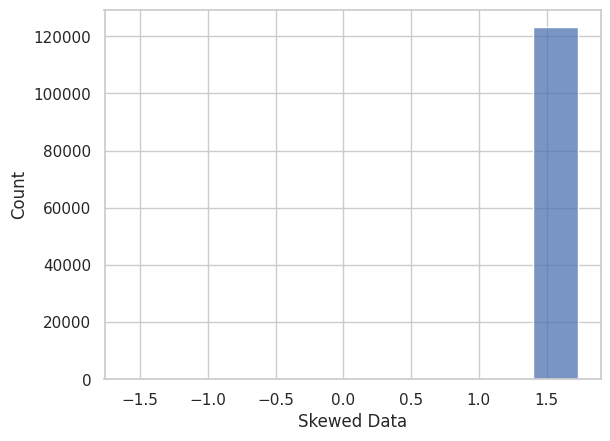

In [34]:
sns.histplot(df['Skewed Data'],bins=10)

<ipython-input-33-0082ba33a030>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Skewed Data'].head(), bins=10)


<Axes: xlabel='Skewed Data', ylabel='Density'>

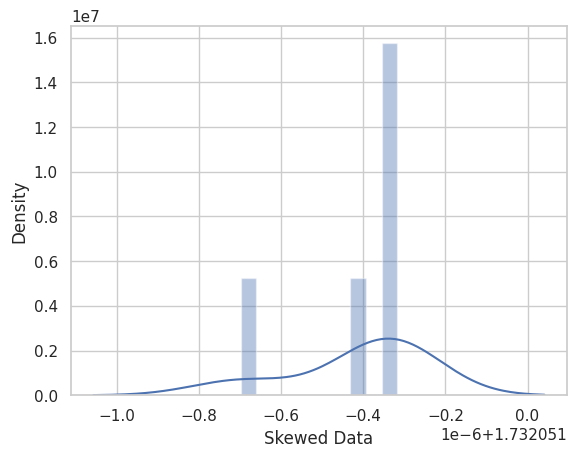

In [33]:
sns.distplot(df['Skewed Data'].head(), bins=10)

Check for missing values in all columns and replace them with the appropriate metric(Mean/Median/Mode)

In [35]:
df.isnull().sum()

InvoiceNo          0
StockCode          0
Description      738
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     52289
Country            1
Skewed Data    52289
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175445 entries, 0 to 175444
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    175445 non-null  object 
 1   StockCode    175445 non-null  object 
 2   Description  174707 non-null  object 
 3   Quantity     175445 non-null  int64  
 4   InvoiceDate  175445 non-null  object 
 5   UnitPrice    175445 non-null  float64
 6   CustomerID   123156 non-null  float64
 7   Country      175444 non-null  object 
 8   Skewed Data  123156 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 12.0+ MB


In [37]:
df.Description.mode()

0    WHITE HANGING HEART T-LIGHT HOLDER
Name: Description, dtype: object

In [38]:
df.Description.fillna(df.Description.mode()[0],inplace = True)

In [39]:
df.CustomerID.mean()
df['CustomerID'].fillna(df['CustomerID'].mean(),inplace=True)

In [41]:
df.Country.mode()
df.Country.fillna(df.Country.mode()[0],inplace = True)

In [42]:
df.isnull().sum()

InvoiceNo          0
StockCode          0
Description        0
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID         0
Country            0
Skewed Data    52289
dtype: int64

Remove duplicate rows

In [43]:
df.duplicated().sum()

1517

In [45]:
df.drop_duplicates(subset=None, keep='first',inplace=True)
df.duplicated().sum()

0

Remove rows which have negative values in Quantity column

In [46]:
df = df[df.Quantity > 0]
df['Quantity'].describe().round(2)

count    170145.00
mean         10.46
std         185.17
min           1.00
25%           1.00
50%           3.00
75%          10.00
max       74215.00
Name: Quantity, dtype: float64

How many orders made by the customers?

In [47]:
df.groupby(by=['CustomerID','Country'], as_index=False)['Quantity'].count().head()

,CustomerID,Country,Quantity
0,12346.0,United Kingdom,1
1,12347.0,Iceland,84
2,12348.0,Finland,28
3,12350.0,Norway,17
4,12352.0,Norway,38


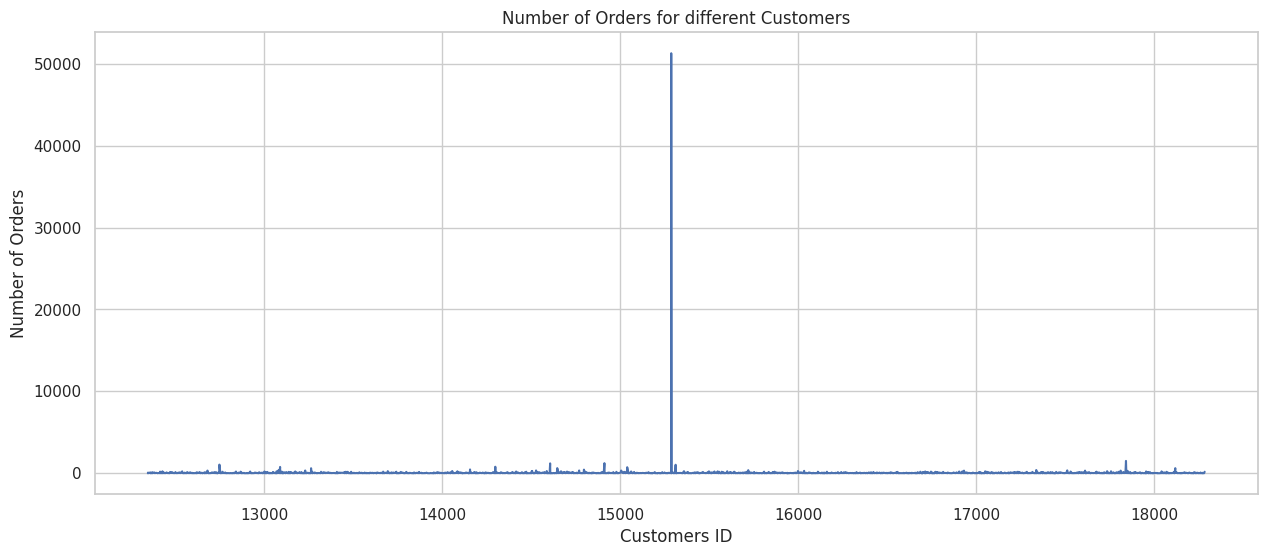

In [48]:
orders = df.groupby(by=['CustomerID','Country'], as_index=False)['Quantity'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID, orders.Quantity)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

TOP 5 customers with higher number of orders

In [49]:
orders.sort_values(by='Quantity', ascending=False).head()

,CustomerID,Country,Quantity
1248,15286.333715,United Kingdom,51283
2292,17841.000000,United Kingdom,1505
1082,14911.000000,EIRE,1232
954,14606.000000,United Kingdom,1207
179,12748.000000,United Kingdom,1056


How many orders for each country?

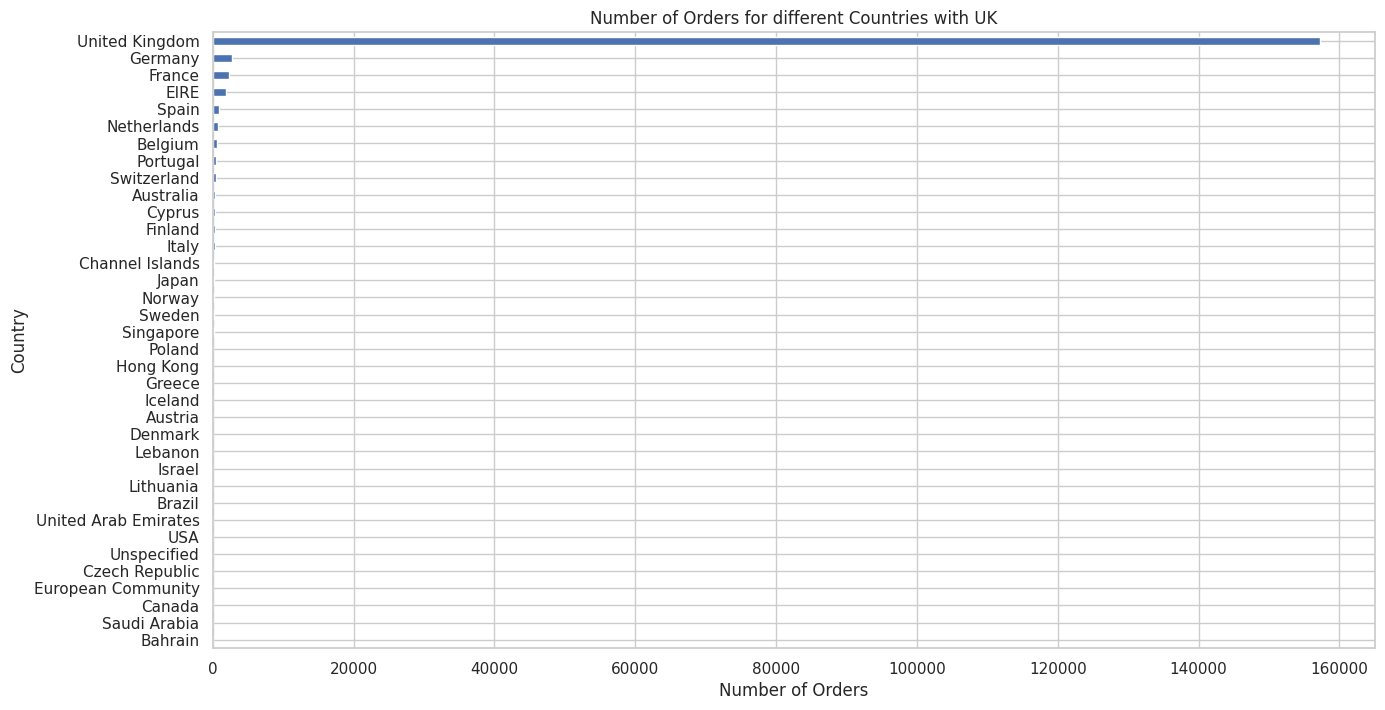

In [50]:
group_country_orders = df.groupby('Country')['InvoiceNo'].count().sort_values()

plt.subplots(figsize=(15,8))
group_country_orders.plot(kind = 'barh')
plt.xlabel('Number of Orders')
plt.ylabel('Country')
plt.title('Number of Orders for different Countries with UK')
plt.show()

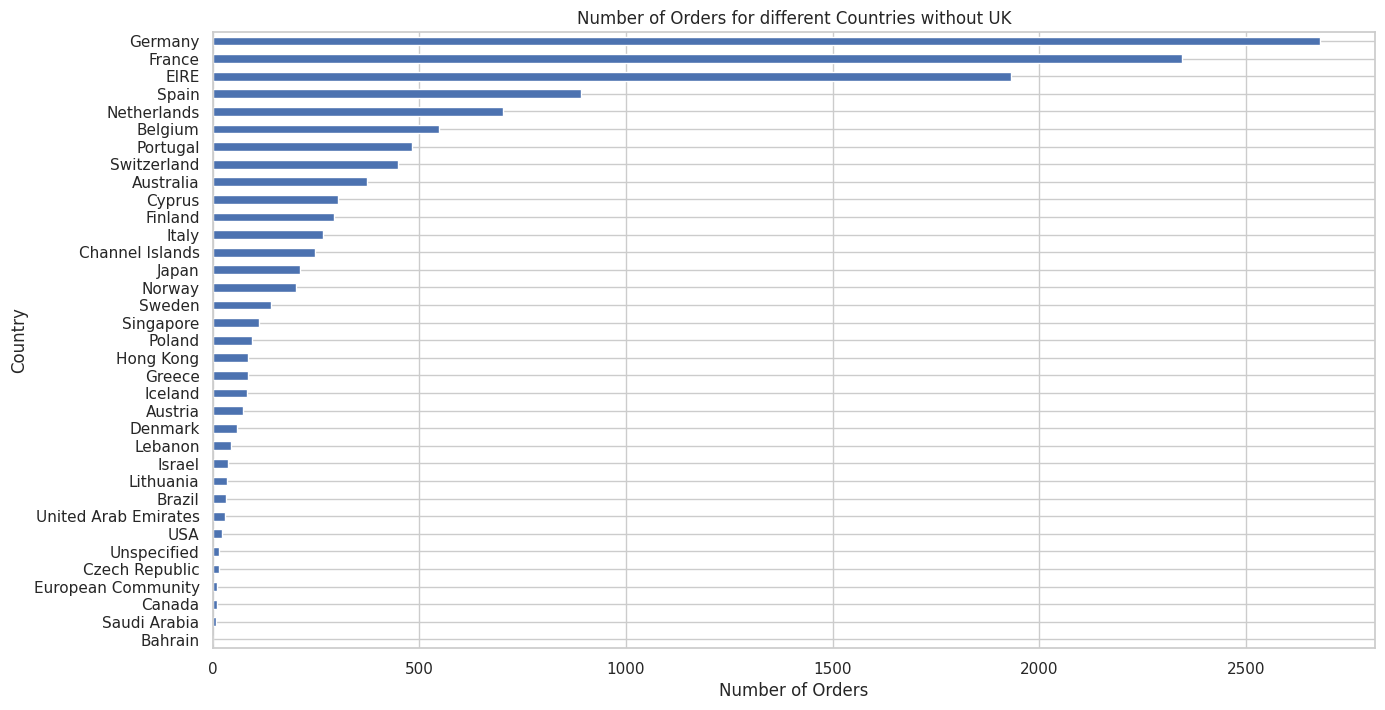

In [51]:
group_country_orders = df.groupby('Country')['InvoiceNo'].count().sort_values()

del group_country_orders['United Kingdom']

plt.subplots(figsize=(15,8))
group_country_orders.plot(kind = 'barh')
plt.xlabel('Number of Orders')
plt.ylabel('Country')
plt.title('Number of Orders for different Countries without UK')
plt.show()
